In [48]:
import pandas as pd
import numpy as np

In [49]:
slu = pd.read_csv('data/slu-Paid_Parking_Occupancy__Last_30_Days_.csv')

Add availability information

1. Calculate occupancy percentage: The date and time (minute) of the transaction as recorded
2. Aavailability (bool) : True if has available parking spaces. 
3. Available parking spaces (int): Number of availabel parking spaces. 0 if paid spaces are equal or more than the parking space count. A car might leave before the parking expire, thus paird occupancy could be higher than the parking space count. 

compute latitude and longitude

In [50]:
location = slu.Location.str[7:-1]
slu.Location.str.split(' ',expand=True)
slu[['Latitude','Longitude']]=location.str.split(' ',expand=True)
slu['Latitude'] = pd.to_numeric(slu['Latitude'])
slu['Longitude'] = pd.to_numeric(slu['Longitude'])

Compute datetime information. 

1. Convert a string of time into a datetime object
2. Check wheter a given date is a US holiday
3. Compute day of the week, hour of the day and minute of the day


In [51]:
from time import time
from pandas import to_datetime

slu['OccupancyDateTime'] = to_datetime(
        slu['OccupancyDateTime'], format='%m/%d/%Y %I:%M:%S %p')
slu['DayOfWeek'] = slu['OccupancyDateTime'].dt.day_of_week
slu['Year'] = slu['OccupancyDateTime'].dt.year
slu['Month'] = slu['OccupancyDateTime'].dt.month
slu['Day'] = slu['OccupancyDateTime'].dt.day
slu['Hour'] = slu['OccupancyDateTime'].dt.hour
slu['Minute'] = slu['OccupancyDateTime'].dt.minute
slu['AvailableSpaceCount'] = slu["ParkingSpaceCount"] - slu["PaidOccupancy"]


In [52]:
slu.head(10)

,OccupancyDateTime,PaidOccupancy,BlockfaceName,SideOfStreet,SourceElementKey,ParkingTimeLimitCategory,ParkingSpaceCount,PaidParkingArea,PaidParkingSubArea,PaidParkingRate,...,Location,Latitude,Longitude,DayOfWeek,Year,Month,Day,Hour,Minute,AvailableSpaceCount
0,2022-03-16 17:05:00,0,MERCER NR ST BETWEEN TERRY AVE N AND BOREN AVE N,N,130802,600.0,5,South Lake Union,South,NaN,...,POINT (-122.33650821 47.62473843),-122.336508,47.624738,2,2022,3,16,17,5,5
1,2022-03-16 10:21:00,0,REPUBLICAN ST BETWEEN MINOR AVE N AND PONTIUS ...,S,80554,120.0,6,South Lake Union,South,NaN,...,POINT (-122.33234469 47.62306574),-122.332345,47.623066,2,2022,3,16,10,21,6
2,2022-03-16 17:57:00,0,EASTLAKE AVE E BETWEEN THOMAS ST AND HARRISON ST,W,10153,120.0,10,South Lake Union,South,NaN,...,POINT (-122.32922659 47.6213762),-122.329227,47.621376,2,2022,3,16,17,57,10
3,2022-03-16 15:08:00,0,MERCER ST BETWEEN YALE AVE N AND EASTLAKE AVE E,S,79790,120.0,9,South Lake Union,South,NaN,...,POINT (-122.32980982 47.62423318),-122.329810,47.624233,2,2022,3,16,15,8,9
4,2022-03-16 09:46:00,0,VALLEY ST BETWEEN MINOR AVE N AND YALE AVE N,N,35889,30.0,1,South Lake Union,North,NaN,...,POINT (-122.33168043 47.62602813),-122.331680,47.626028,2,2022,3,16,9,46,1
5,2022-03-16 11:53:00,0,HARRISON ST BETWEEN PONTIUS AVE N AND YALE AVE N,S,10802,120.0,6,South Lake Union,South,NaN,...,POINT (-122.33105357 47.62190148),-122.331054,47.621901,2,2022,3,16,11,53,6
6,2022-03-16 15:43:00,0,HARRISON ST BETWEEN PONTIUS AVE N AND YALE AVE N,S,10802,120.0,6,South Lake Union,South,NaN,...,POINT (-122.33105357 47.62190148),-122.331054,47.621901,2,2022,3,16,15,43,6
7,2022-03-16 09:31:00,0,DENNY LOWER WAY BETWEEN STEWART ST AND EASTLAK...,N,32849,120.0,5,South Lake Union,South,NaN,...,POINT (-122.32979337 47.61857744),-122.329793,47.618577,2,2022,3,16,9,31,5
8,2022-03-16 11:55:00,0,REPUBLICAN ST BETWEEN 9TH AVE N AND WESTLAKE A...,S,80550,120.0,4,South Lake Union,South,NaN,...,POINT (-122.33914163 47.62315969),-122.339142,47.623160,2,2022,3,16,11,55,4
9,2022-03-16 15:46:00,0,REPUBLICAN ST BETWEEN MINOR AVE N AND PONTIUS ...,S,80554,120.0,6,South Lake Union,South,NaN,...,POINT (-122.33234469 47.62306574),-122.332345,47.623066,2,2022,3,16,15,46,6


In [ ]:
slu.boxplot(column= 'AvailableSpaceCount', by = "Hour", figsize=(20,10), grid = False);

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Average available space count by DayOfWeek')

mean_space = slu.pivot_table('AvailableSpaceCount', index = 'DayOfWeek', aggfunc='mean')
plt.plot(mean_space)
plt.show()

In [60]:
X = slu.drop(
        ['OccupancyDateTime', 'ParkingSpaceCount','PaidOccupancy','PaidParkingRate','PaidParkingArea', 'PaidParkingSubArea', 'ParkingCategory', 'Location','SourceElementKey','BlockfaceName','SideOfStreet','AvailableSpaceCount', 'Year'], axis=1)
y = slu['AvailableSpaceCount']

In [61]:
X.columns

Index(['ParkingTimeLimitCategory', 'Latitude', 'Longitude', 'DayOfWeek',
       'Month', 'Day', 'Hour', 'Minute'],
      dtype='object')

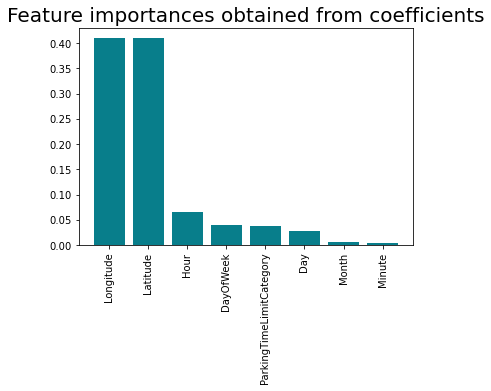

In [64]:
importances = pd.DataFrame(data={
    'Features': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Features'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()